# 1. Importación de Librerías y Carga de Datos
Usa pandas para cargar los datasets. (hacemos los respectivos pip install de cada librería.

In [2]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Para manejar valores faltantes
from sklearn.feature_selection import SelectKBest, f_classif

# Cargar el dataset
df = pd.read_csv('winequality-red.csv')

# Visualizar las primeras filas del dataset
print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

# 2. Análisis Exploratorio de Datos (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Columnas del Dataset: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free s

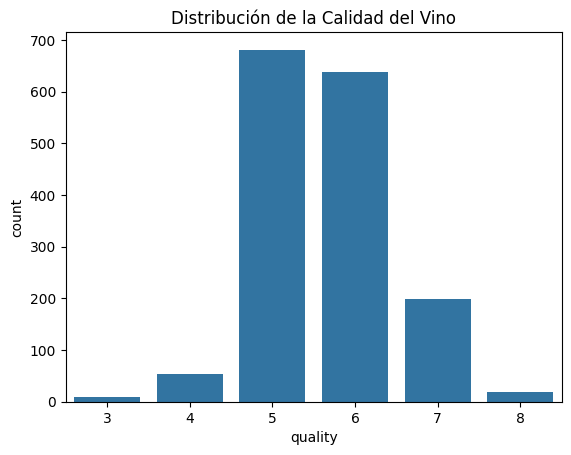

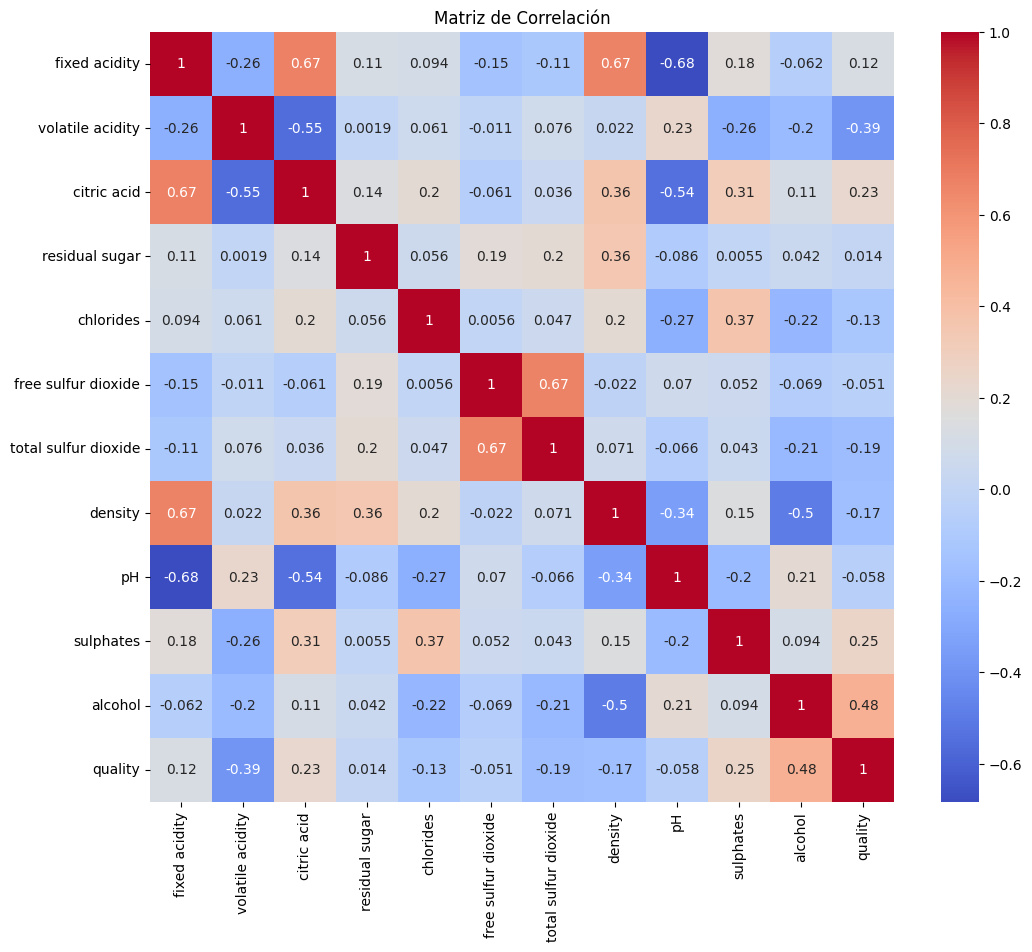

In [3]:
# Mostrar información general del dataset
df.info()
df.describe()

# Verificar los nombres de las columnas
print("Columnas del Dataset:", df.columns)

# Gráficas de distribución para la variable objetivo (calidad del vino)
sns.countplot(x='quality', data=df)
plt.title('Distribución de la Calidad del Vino')
plt.show()

# Matriz de correlación para ver la relación entre las características
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


# 3. Preprocesamiento de Datos

## Manejo de valores faltantes:

In [4]:
# Imputar valores faltantes con la media para las columnas numéricas
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Verificar que no haya valores faltantes
print(df.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## Estandarización de características numéricas:

In [5]:
# Seleccionar todas las características numéricas excepto la variable objetivo 'quality'
numerical_features = df.columns[df.columns != 'quality']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Verificar que el preprocesamiento se realizó correctamente
print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  quality  
0 -0.960246      5.0  
1 -0.58477

# 4. Selección de Características
Usa un mapa de calor para ver las correlaciones.

In [6]:
# Seleccionar características y variable objetivo
X = df.drop(['quality'], axis=1)
y = df['quality']

# Selección de características usando SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

# Visualización de las características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)


Características seleccionadas: Index(['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates',
       'alcohol'],
      dtype='object')



# 5. División del Dataset en Conjuntos de Entrenamiento y Prueba

In [7]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


# 6. Entrenamiento de los Modelos

In [8]:
# Entrenamiento del modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

# 7. Evaluación del Modelo

Accuracy: 0.57
Precision: 0.58
Recall: 0.57
F1-Score: 0.54


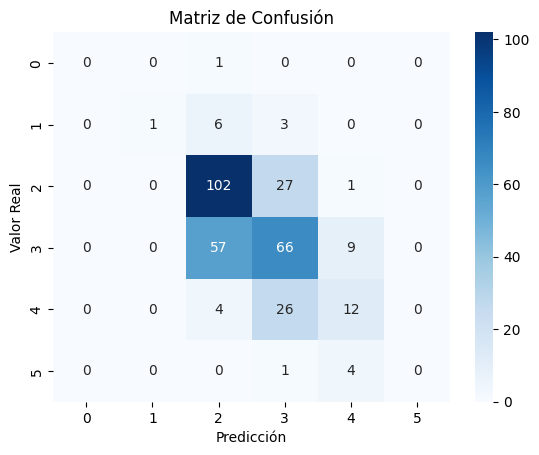

              precision    recall  f1-score   support

         3.0       1.00      0.00      0.00         1
         4.0       1.00      0.10      0.18        10
         5.0       0.60      0.78      0.68       130
         6.0       0.54      0.50      0.52       132
         7.0       0.46      0.29      0.35        42
         8.0       1.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.77      0.28      0.29       320
weighted avg       0.58      0.57      0.54       320



In [10]:
# Predicción en el conjunto de prueba
y_pred = tree_model.predict(X_test)

# Evaluación de las métricas de desempeño
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación con zero_division=1 para evitar advertencias
print(classification_report(y_test, y_pred, zero_division=1))


# 8.Visualización de Resultados

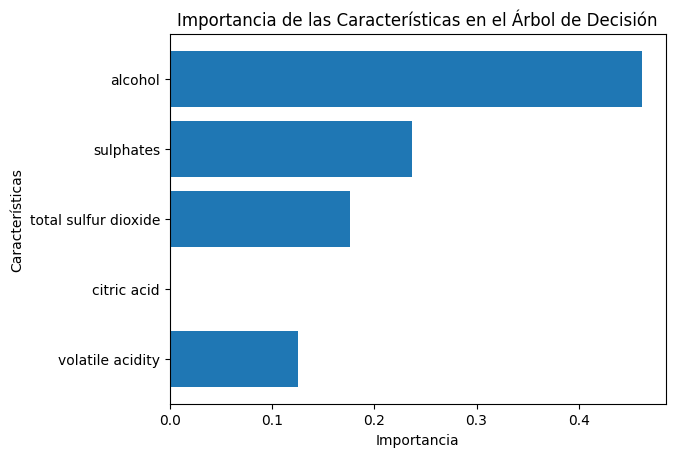

In [11]:
# Visualización de la importancia de las características
feature_importance = tree_model.feature_importances_
plt.barh(selected_features, feature_importance)
plt.title('Importancia de las Características en el Árbol de Decisión')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()


La gráfica muestra la **importancia de las características** en el modelo de Árbol de Decisión para predecir la calidad del vino. Cada barra representa la influencia de una característica en la clasificación del modelo, y una mayor longitud de la barra indica una mayor importancia.

### Análisis de la Gráfica:
1. **Alcohol**: Es la característica con la mayor importancia en el modelo, lo que sugiere que el contenido de alcohol en el vino tiene una gran influencia en la predicción de su calidad.
2. **Sulphates**: Es la segunda característica más importante, lo que indica que la presencia de sulfitos también tiene un impacto significativo en la calidad del vino.
3. **Total Sulfur Dioxide**: Esta característica también contribuye al modelo, aunque en menor medida que el alcohol y los sulfitos.
4. **Citric Acid** y **Volatile Acidity**: Tienen menor importancia en comparación con las demás características seleccionadas, pero aún juegan un papel en la predicción de la calidad.

### Conclusión:
El modelo de **Árbol de Decisión** ha identificado que el contenido de alcohol y los sulfitos son los factores más relevantes para determinar la calidad del vino tinto. Esto sugiere que, para mejorar la calidad del vino, sería conveniente prestar especial atención a estos dos parámetros. Sin embargo, otras características como la acidez volátil y el ácido cítrico también deben considerarse, aunque su impacto es menor.

Es posible que se obtenga un mejor rendimiento si se experimenta con la profundidad del árbol, la selección de características o la combinación con otros modelos.
